<h1>HW4</h1>

# Question 1
### (Binomial) Read the following example and complete the exercises 

#### Tossing a Biased Coin
You are asked if you want to bet on a coin. 
```
You have 10 coin tosses. 
```
```
If you get exactly 4 heads, you win 30 dollars. 
```
```
Otherwise you loss 5 dollars. 
```
```
Based on our previous observation, the coin is biased. The chance of getting head is approximately 0.4. 
```
Now you need to think about if you want to play it or not. 

### 1.1 

You recall that binomial distribution is commonly used to determine the probability of observing a specified number of successful outcomes in a specified number of trials. The equation for pdf of binomial distribution is: 

\begin{equation*}
P(X = k) = \frac{n!}{k!(n-k)!}p^k(1-p)^{n-k}
\end{equation*}

Where 
```
k: Number of successful trials
n: Total number of trials
p: Probability of success in one trial
```

Create a functon to calculate the pdf of a binomial distribution

```
Function name: binomial_p
```
```
Input: n, k, p
```
```
Output: pdf of a binomial distribution
```
```
Example: binomial_p(10, 2, 0.4) = 0.12093235199999998
```

In [112]:
function binomial_p(n::Int, k::Int, p::Float64)
    coeff = 1.0
    for i in 1:k
        coeff *= (n - k + i) / i
    end
    prob = (p^k) * ((1-p)^(n-k))
    return coeff * prob
end

result = binomial_p(10, 2, 0.4)
println("binomial_p(10, 2, 0.4) = ", result)


binomial_p(10, 2, 0.4) = 0.12093235199999997


### 1.2 

Now you want to use the function to calculate the probabilities of 
1. Winning the bet
2. Losing the bet

The chance of winning the bet:

In [113]:
n = 10  # number of coin tosses
p = 0.4  # probability of getting heads
k_win = 4  # number of heads needed to win

p_win = binomial_p(n, k_win, p)

println("The chance of winning the bet: ", p_win)



The chance of winning the bet: 0.250822656


The chance of losing the bet:

In [114]:
p_lose = 1 - p_win
println("The chance of losing the bet: ", p_lose)

The chance of losing the bet: 0.749177344


### 1.3

Would you expect yourself earning or losing money in the game?

\*Hint: What is the expected outcome

In [115]:
win_amount = 30  # amount won if successful
lose_amount = 5  # amount lost if unsuccessful

# Calculate expected value
expected_value = (p_win * win_amount) - (p_lose * lose_amount)

println("Expected value of the game: $(round(expected_value, digits=2))")

Expected value of the game: 3.78


### 1.4

1. What if you need to get exactly 3 heads to win the game? What are the probabilities of winning and losing? 

2. Would you expect yourself earning or losing money in this case?

In [116]:
k_win = 3  # number of heads needed to win
p_win = binomial_p(n, k_win, p)
p_lose = 1 - p_win
expected_value = (p_win * win_amount) - (p_lose * lose_amount)

println("Probability of winning (exactly 3 heads): ", round(p_win, digits=4))
println("Probability of losing: ", round(p_lose, digits=4))
println("Expected value of the game: $(round(expected_value, digits=2))")


Probability of winning (exactly 3 heads): 0.215
Probability of losing: 0.785
Expected value of the game: 2.52


In [117]:
if expected_value > 0
    println("You would expect to earn money in the long run.")
else
    println("You would expect to lose money in the long run.")
end

You would expect to earn money in the long run.


# Question 2
### (Chi-Square) Complete the following exercises 


#### Run the following three cells to define x, y_true, noise, and y_oberved

1. x = 0:1:10
2. y_true = 4x - 2
3. noise = N(0, $\sigma$ = 3)
4. y_observed = y_true + noise


In [118]:
import Pkg
Pkg.add(["Distributions", "Plots", "Polynomials", "Random", "Statistics"])

   Resolving package versions...
  No Changes to `C:\Users\Ria\Downloads\Everything\School\Grad_Stony\BME502\JuliaNotebooks\BME-502-2025-homeworks\Project.toml`
  No Changes to `C:\Users\Ria\Downloads\Everything\School\Grad_Stony\BME502\JuliaNotebooks\BME-502-2025-homeworks\Manifest.toml`


In [119]:
import Distributions as di
import Plots
import Polynomials
import Random
import Statistics

In [120]:
x = 0:1:10
y_true = 4 .* x .- 2
sigma = 3
noise = Random.rand(di.Normal(0,sigma),length(x))
y_observed = y_true .+ noise;

### 2.1

1. Fit the data with a first order polynomial
2. Store the coefficients of the fitted polynomial in fit_coeff

In [121]:
using Polynomials: fit, coeffs

fit_result = fit(x, y_observed, 1)
fit_coeff = coeffs(fit_result)

println("Fitted coefficients:")
println("Intercept: ", fit_coeff[1])
println("Slope: ", fit_coeff[2])

Fitted coefficients:
Intercept: -0.6700408262575
Slope: 3.808059715420599


### 2.2

Given $\chi^2$ defined as:
$$\chi^{2}=\sum_{i}^{N}{\frac{(y_{i}-f(x_{i},\theta))^2}{\sigma_{i}^2}}$$

Create a function to calculate Chi-square value for the $1^{st}$ order polynomial fit

```
Function name: chisqr
```
```
Input: b, m, x, y_observed, sigma
```
```
m and b are the coefficients in the first order polynomial in which m * x + b = y_fit
```
```
Output: Chi-square value of the polynomial model
```

In [122]:
function chisqr(b::Float64, m::Float64, x::Vector{Float64}, y_observed::Vector{Float64}, sigma::Float64)
    """
    Calculate the Chi-square value for a first-order polynomial fit.

    Args:
        b (Float64): Intercept of the fitted polynomial.
        m (Float64): Slope of the fitted polynomial.
        x (Vector{Float64}): Vector of x values.
        y_observed (Vector{Float64}): Vector of observed y values.
        sigma (Float64): Standard deviation of the noise.

    Returns:
        Float64: Chi-square value of the polynomial model.
    """

    y_fit = m .* x .+ b  
    chi_square = sum(((y_observed .- y_fit).^2) ./ (sigma^2))
    return chi_square
end


chisqr (generic function with 1 method)

### 2.3

\* Don't define random seed anywhere in the notebook
1. Create a empty list chi2_list
2. Use a for/while loop to run through the data simulation and model fitting (as done in the previous steps) 10000 times
3. In each iteration, calculate the Chi-square value for the fitted model and add it to the chi2_list


In [123]:
num_iterations = 10000
x = collect(0.0:1.0:10.0)
sigma = 3.0
chi2_list = Float64[]  # initialize empty list to store chi-square values

for i in 1:num_iterations
    # simulate data
    y_true = 4 .* x .- 2
    noise = rand(di.Normal(0, sigma), length(x))
    y_observed = y_true .+ noise

    fit_result = fit(x, y_observed, 1)
    fit_coeff = coeffs(fit_result)
    b = fit_coeff[1]  
    m = fit_coeff[2]  

    chi_square_value = chisqr(b, m, x, y_observed, sigma)
    push!(chi2_list, chi_square_value)
end

println("Number of Chi-square values calculated: ", length(chi2_list))

Number of Chi-square values calculated: 10000


### 2.4

1. Calculate the mean of chi2_list
2. Explain if the mean value (degree of freedom) make sense or not


In [124]:
using Statistics
mean_chi2 = mean(chi2_list)
println("Mean Chi-square value: ", mean_chi2)

Mean Chi-square value: 8.947318341110659


In [125]:
n = length(x)  
p = 2  
degrees_of_freedom = n - p

println("Degrees of freedom: ", degrees_of_freedom)

#check if the mean chi-square value is close to the degrees of freedom
if abs(mean_chi2 - degrees_of_freedom) < 1 
    println("The mean Chi-square value is close to the degrees of freedom, which makes sense.")
else
    println("The mean Chi-square value is not close to the degrees of freedom, which might indicate a problem with the model or data.")
end

Degrees of freedom: 9
The mean Chi-square value is close to the degrees of freedom, which makes sense.


### 2.5

1. Define a Chi-square distribution using the Degree of freedom from 2.4
2. Generate x_dist = 0:0.1:40
3. Calculate pdf of the Chi-square distribution using x_dist
4. Plot the chi2_list in a histogram with bin = 50 
5. Plot the pdf on top of the chi2_list histogram 

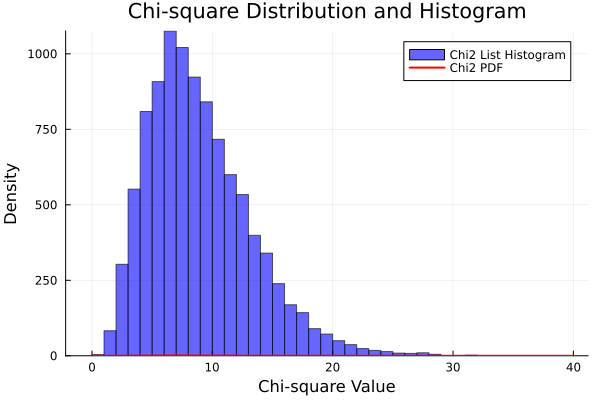

In [126]:
chi2_dist = Chisq(degrees_of_freedom)
x_dist = collect(0.0:0.1:40.0)


pdf_values = pdf.(chi2_dist, x_dist)
histogram(chi2_list, bins=50, density=true, label="Chi2 List Histogram", alpha=0.6, color="blue")


pdf_values ./= maximum(pdf_values)

plot!(x_dist, pdf_values, label="Chi2 PDF", linewidth=2, color="red")

xlabel!("Chi-square Value")
ylabel!("Density")
title!("Chi-square Distribution and Histogram")



### 2.6

Given the likelihood is:
$$P(\{y_{i}(x_{i})\}\mid \theta)\propto \exp\big(-\frac{\chi^2}{2}\big)$$

1. Run the following cell to create a function to calculate the likelihood (make sure you named the variables as asked in the previous questions)
2. Define m_range = 1:0.01:8
3. Define b_range = -9:0.01:10
4. Make a contour plot to visualize the distribution of the likelihood


In [127]:
chi2poly(b, m) = chisqr(b, m, x, y_observed, sigma)
p_chi2poly(b, m) = exp(-chi2poly(b, m)/2);

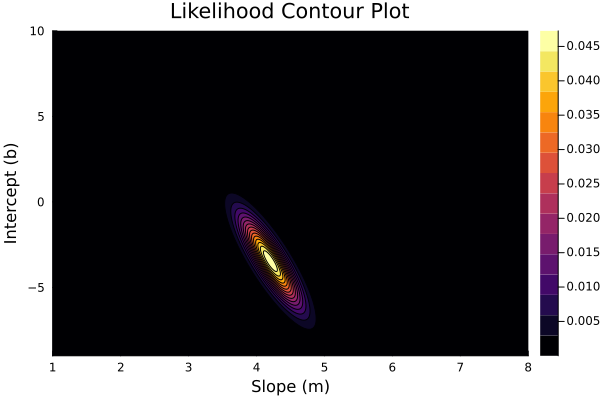

In [128]:
m_range = 1.0:0.01:8.0
b_range = -9.0:0.01:10.0
m_grid = collect(m_range)
b_grid = collect(b_range)

function likelihood(b::Float64, m::Float64, x::Vector{Float64}, y_observed::Vector{Float64}, sigma::Float64)
    chi2 = chisqr(b, m, x, y_observed, sigma)
    return exp(-chi2 / 2)
end

likelihood_values = [likelihood(b, m, x, y_observed, sigma) for b in b_grid, m in m_grid]

contour(m_grid, b_grid, likelihood_values,
        xlabel="Slope (m)", ylabel="Intercept (b)",
        title="Likelihood Contour Plot", fill=true)

### 2.7

1. Redefine x = 0:0.5:4 and update y_observed. Plot the likelihood with the new x, y_observed and explain how the plot is different from 2.6
2. Redefine x = 0:2:20 and update y_observed. Plot the likelihood with the new x, y_observed and explain how the plot is different from 2.6

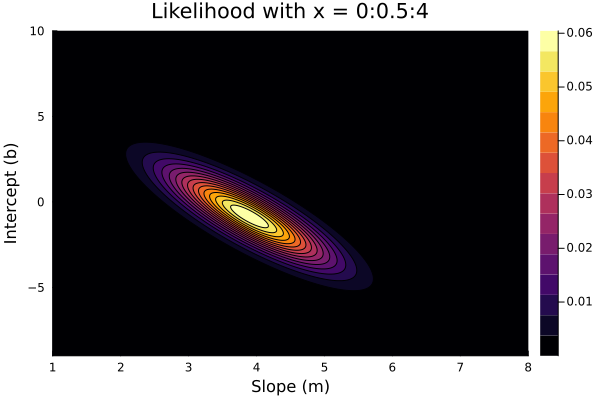

In [129]:
x1 = collect(0.0:0.5:4.0)

y_true1 = 4 .* x1 .- 2
noise1 = rand(di.Normal(0, sigma), length(x1))
y_observed1 = y_true1 .+ noise1

likelihood_values1 = [likelihood(b, m, x1, y_observed1, sigma) for b in b_grid, m in m_grid]

contour(m_grid, b_grid, likelihood_values1,
        xlabel="Slope (m)", ylabel="Intercept (b)",
        title="Likelihood with x = 0:0.5:4", fill=true)


The contour appears slightly less tightly packed compared to the original plot. This suggests that the precision in estimating m and b might be slightly lower when using the x = 0:0.5:4 data. The center of the innermost contour appears to be shifted. It looks like m and b have both decreased. A longer range of x provides more information about the overall trend and allows for a more precise estimate of the slope. By shortening the range, we are making the slope estimation more sensitive to the specific data points within that shorter range, and also potentially introducing more uncertainty because we don't observe the trend over a larger interval.

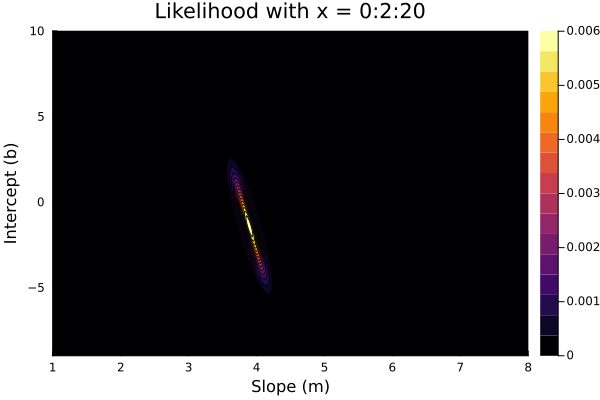

In [130]:
x2 = collect(0.0:2.0:20.0)

y_true2 = 4 .* x2 .- 2
noise2 = rand(di.Normal(0, sigma), length(x2))
y_observed2 = y_true2 .+ noise2

likelihood_values2 = [likelihood(b, m, x2, y_observed2, sigma) for b in b_grid, m in m_grid]

contour(m_grid, b_grid, likelihood_values2,
        xlabel="Slope (m)", ylabel="Intercept (b)",
        title="Likelihood with x = 0:2:20", fill=true)

The contours are more tightly packed here. This indicates a much higher precision in the parameter estimates (m and b). The likelihood function is more sensitive to changes in m and b. It looks like the slope increased but the intercept decreased. This could be becauase of the larger interval size, which has the opposite effect of the previous problem, where we shortened the range.

### 2.8

Change x back to x = 0:1:10

1. Redefine sigma = 6 and update y_observed. Plot the likelihood with the new y_observed and explain how the plot is different from 2.6
2. Redefine sigma = 1.5 and update y_observed. Plot the likelihood with the new y_observed and explain how the plot is different from 2.6

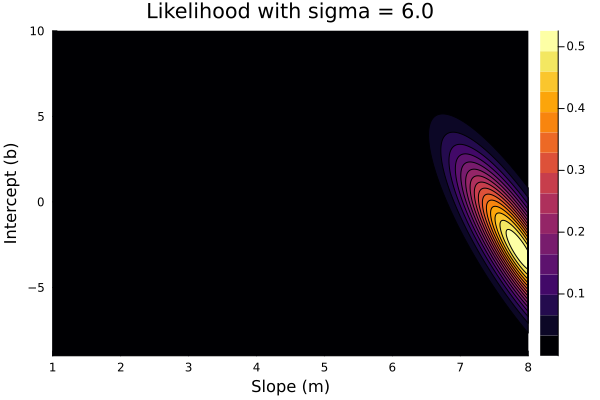

In [131]:
x = collect(0.0:1.0:10.0)
sigma3 = 6.0

y_true3 = 4 .* x2 .- 2
noise3 = rand(di.Normal(0, sigma), length(x2))
y_observed3 = y_true3 .+ noise3

likelihood_values3 = [likelihood(b, m, x, y_observed3, sigma3) for b in b_grid, m in m_grid]

contour(m_grid, b_grid, likelihood_values3,
        xlabel="Slope (m)", ylabel="Intercept (b)",
        title="Likelihood with sigma = 6.0", fill=true)

Much more spread-out contours, indicating significantly lower precision in the parameter estimates. The likelihood function is less sensitive to changes in m and b. The slope has increased significantly. We increase sigma from its original value which tells the model that the data is more noisy and that there is more uncertainty in the observed y values. This increased uncertainty has a direct impact on the likelihood function and the resulting contour plot.

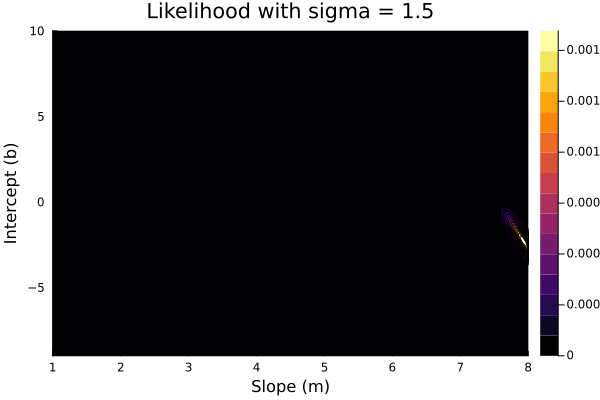

In [132]:
x = collect(0.0:1.0:10.0)
sigma4 = 1.5

y_true4 = 4 .* x2 .- 2
noise4 = rand(di.Normal(0, sigma4), length(x2))
y_observed4 = y_true4 .+ noise4

likelihood_values4 = [likelihood(b, m, x, y_observed4, sigma4) for b in b_grid, m in m_grid]

contour(m_grid, b_grid, likelihood_values4,
        xlabel="Slope (m)", ylabel="Intercept (b)",
        title="Likelihood with sigma = 1.5", fill=true)

With smaller sigma value, we have the opposite effect here. There is less uncertainty, and so the contours are much tighter, and the slope has increased significantly here too.